AIM : Applying decision tree, k-means and algglomerative clustering on online marketing data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("ifood_df.csv")

In [6]:
train.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
train.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [9]:
import seaborn as sns

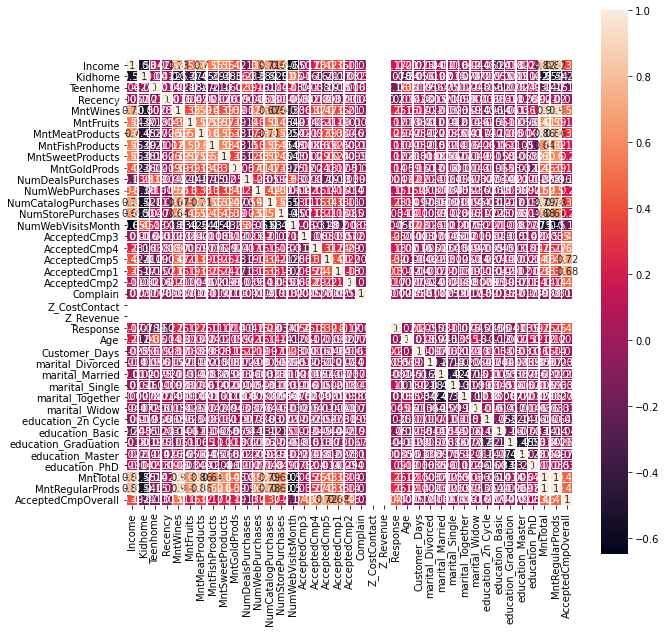

In [10]:
_, graph = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(), annot = True, linewidth =.5, ax=graph, square=True)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [12]:
from sklearn.model_selection import train_test_split
X = train.drop('Response', axis=1)
y = train['Response']


In [13]:
X

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [14]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2200    0
2201    0
2202    0
2203    0
2204    1
Name: Response, Length: 2205, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
clf.score(X_train,y_train)

0.9931972789115646

In [19]:
clf.score(X_test,y_test)

0.8231292517006803

In [20]:
y_pred = clf.predict(X_test)

In [21]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [22]:
print(confusion_matrix)

[[329  35]
 [ 43  34]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       364
           1       0.49      0.44      0.47        77

    accuracy                           0.82       441
   macro avg       0.69      0.67      0.68       441
weighted avg       0.82      0.82      0.82       441



K-Means

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42 )

In [26]:
kmeans.fit(X_train)

KMeans(init='random', n_clusters=3, random_state=42)

In [27]:
# The lowest SSE value
kmeans.inertia_

110382127582.48293

In [28]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 5.17089230e+04,  4.21311475e-01,  8.18032787e-01,
         4.93622951e+01,  2.77155738e+02,  1.72770492e+01,
         8.80934426e+01,  2.30295082e+01,  1.63262295e+01,
         4.43032787e+01,  3.09016393e+00,  4.61311475e+00,
         2.18524590e+00,  5.91967213e+00,  5.72786885e+00,
         6.55737705e-02,  8.52459016e-02,  4.91803279e-03,
         1.31147541e-02,  1.31147541e-02,  3.27868852e-03,
         3.00000000e+00,  1.10000000e+01,  5.36393443e+01,
         2.51361639e+03,  1.14754098e-01,  3.78688525e-01,
         2.00000000e-01,  2.54098361e-01,  5.24590164e-02,
         8.19672131e-02,  1.38777878e-17,  4.80327869e-01,
         1.85245902e-01,  2.52459016e-01,  4.21881967e+02,
         3.77578689e+02,  1.81967213e-01],
       [ 7.55666118e+04,  8.66551127e-02,  3.76083189e-01,
         4.97001733e+01,  6.21734835e+02,  5.62495667e+01,
         3.82249567e+02,  8.06169844e+01,  6.03604853e+01,
         7.09324090e+01,  1.64991334e+00,  5.49393414e+00,
         5.25

In [29]:
# The number of iterations required to converge
kmeans.n_iter_

17

In [30]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

C:\Users\aradh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


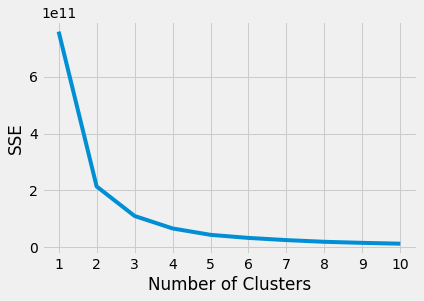

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

No. of clusters = 3

# Algglomerative Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
clustering = AgglomerativeClustering().fit(X_train)
clustering

AgglomerativeClustering()

In [34]:
clustering.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

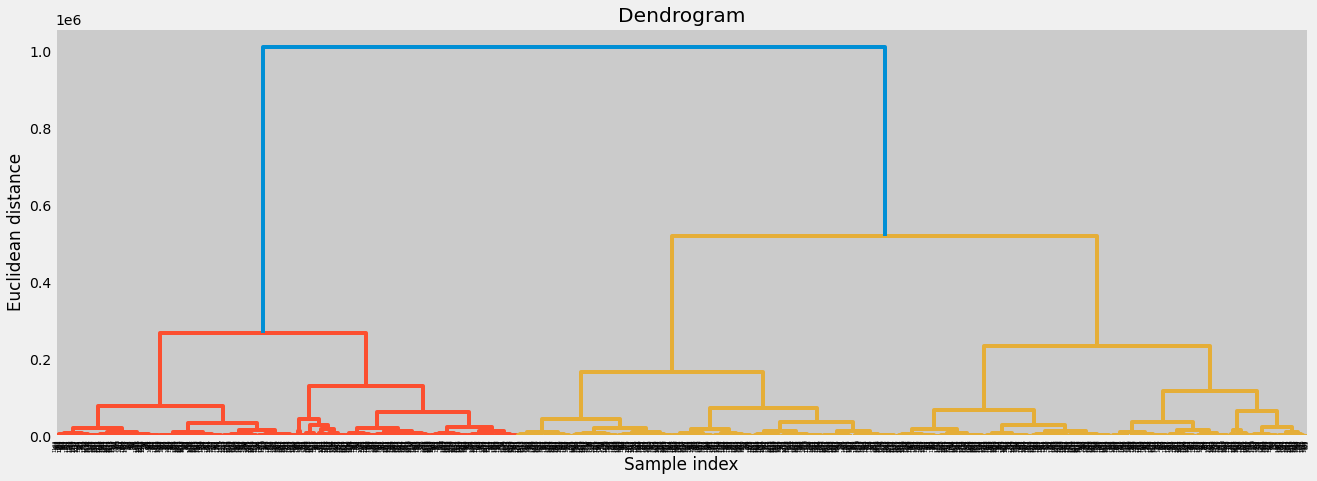

In [35]:
import scipy.cluster.hierarchy as sc
# Plot dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")
# Create dendrogram
sc.dendrogram(sc.linkage(X_train, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()